In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

from tqdm import tqdm

sns.set(rc = {"figure.figsize":(16, 9)})

In [2]:
df = pd.read_csv("Data.csv")

In [3]:
vols = np.array(df["Volume"])
vols.sort()

In [4]:
changes = np.array(df["AskAfter"] - df["AskBefore"])
changes.sort()

In [5]:
dfAskT30 = df[df["AskAfter"] - df["AskBefore"] > 0.11]

In [6]:
dfVolT30 = df[df["Volume"] > 9e5]

In [7]:
NumsVol = np.array(dfVolT30["Unnamed: 0"])
NumsAsk = np.array(dfAskT30["Unnamed: 0"])

Важное наблюдение - объем ордера и сдвиг цены после его исполнения вообще никак не связаны. Весь топ по сдвигам состоит из относительно маленьких ордеров порядка тысяч. Ордера же порядка миллиона цену почти не двигали...

In [8]:
filename = "../data preparing/USD000UTSTOM_l2_ask.txt"
# filename = "exp.txt"

In [9]:
file = open(filename, 'r')

mem_len = 1000

times = np.full(30, 0, dtype=float)
asks = np.full((30, mem_len + 1, 2), 0, dtype=float)
volumes = np.full(30, 0, dtype=int)

i = 0

number = 0

iter = 1

line = next(file)

while True:
    try:
        line = next(file)
    except:
        break

    if not line[0] == "P":
        # print(line)
        line = line.split()
        price = float(line[2][:-1])
        time = sum(np.array(line[0].split(":")).astype(float) * np.array([3600, 60, 1])) - 36000
    else:
        if number in NumsAsk:
            line = line.split()
            volumes[i] = int(line[-1])

            try:
                line = next(file)
            except:
                break
            line = line.split()

            times[i] = time
            asks[i][0][0] = price
            asks[i][0][1] = time

            for j in range(1, mem_len + 1):
                try:
                    line = next(file)
                except:
                    break
                if line[0] == "P":
                    line = line.split()
                    asks[i][j][0] = float(line[1])
                    asks[i][j][1] = -1
                    j-=1
                    continue

                line = line.split()
                if(abs(float(line[2][:-1])) < 1e-5):
                    print(line)
                asks[i][j][0] = float(line[2][:-1])
                asks[i][j][1] = sum(np.array(line[0].split(":")).astype(float) * np.array([3600, 60, 1])) - 36000
            
            i += 1

        number += 1

    iter += 1


# print(asks_before, asks_after, volumes, times)

file.close()

In [12]:
print(dfAskT30)

       Unnamed: 0          Time  AskBefore  AskAfter   Volume
280           280     48.000975     61.675    61.860   2000.0
288           288     49.000340     61.400    61.870   2000.0
342           342     86.000760     61.637    61.845   1000.0
573           573    246.000139     61.662    61.862   1000.0
841           841    741.000885     61.510    61.882   2000.0
1089         1089   1074.000510     61.780    61.942   2000.0
1561         1561   1660.000056     61.015    62.007   1000.0
3412         3412   3524.000307     62.010    62.187   5000.0
3824         3824   3835.000720     61.955    62.132  25000.0
3892         3892   3898.000758     61.947    62.125   6000.0
4567         4567   4747.000643     61.837    62.022   1000.0
4654         4654   4779.000504     61.110    61.997   1000.0
4672         4672   4784.000865     61.190    62.005   1000.0
4751         4751   4931.000069     61.815    62.017   1000.0
5320         5320   5767.000399     61.350    61.962   4000.0
5363    

In [14]:
asks[0,:,0]

array([61.675, 61.86 , 61.86 , ..., 61.837, 61.837, 61.837])

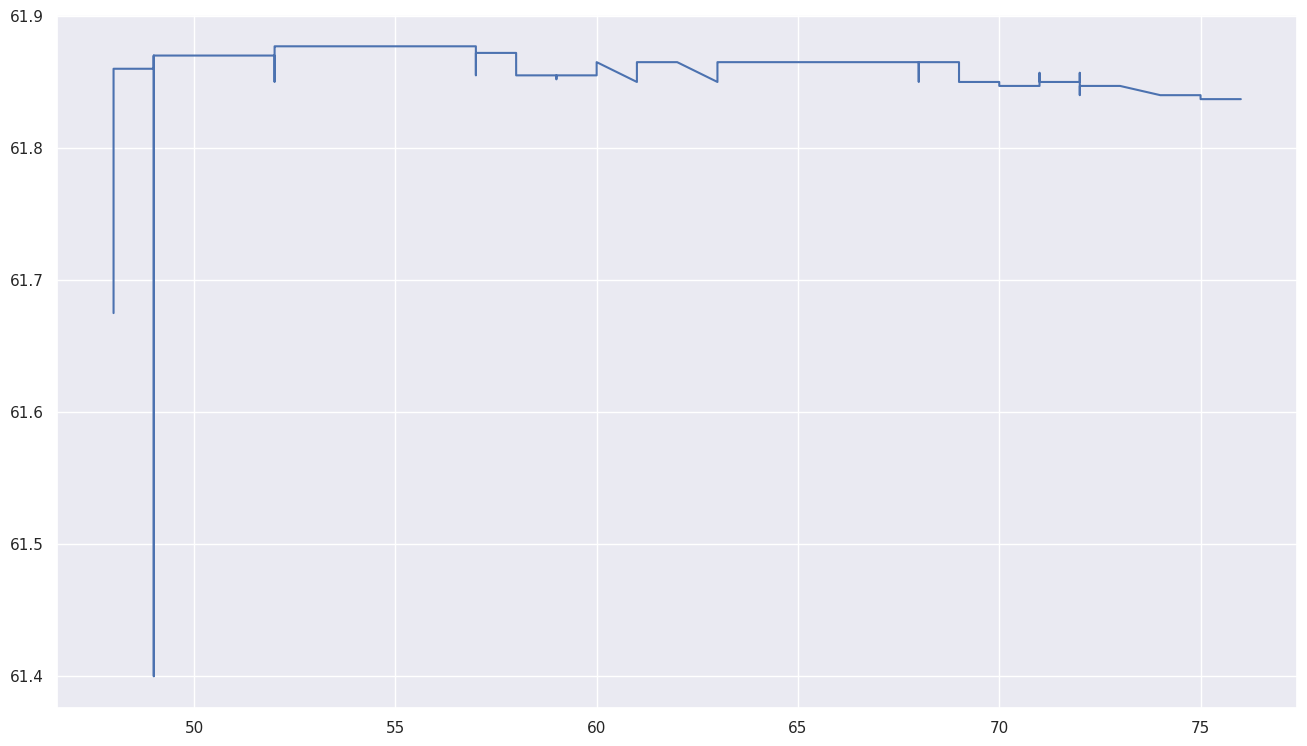

In [15]:
k = 0

ptime = np.array([])
pask = np.array([])
for j in range(mem_len + 1):
    if not (asks[k,j,1] < 1e-5 or asks[k,j,1] < 1e-5):
        ptime = np.append(ptime, asks[k,j,1])
        pask = np.append(pask, asks[k,j,0])

plt.plot(ptime, pask)


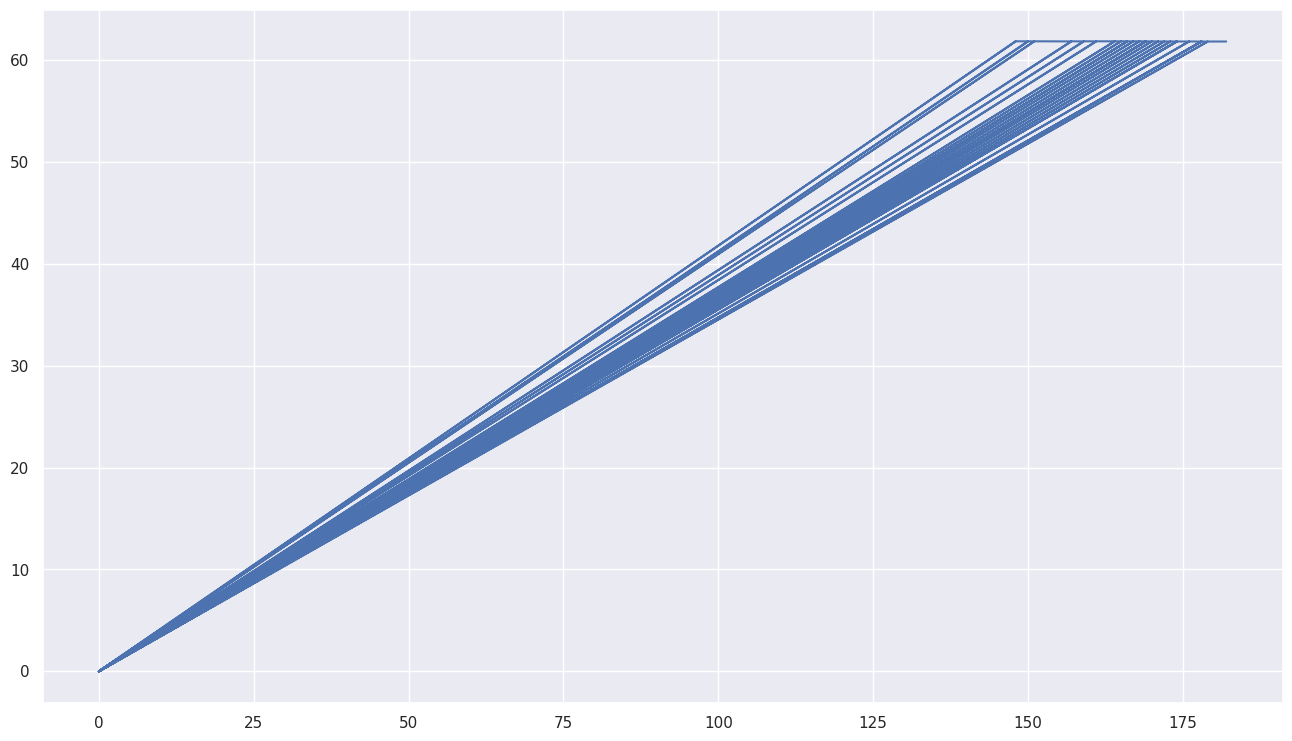

In [108]:
plt.plot(asks[2,:,1], asks[2,:,0])